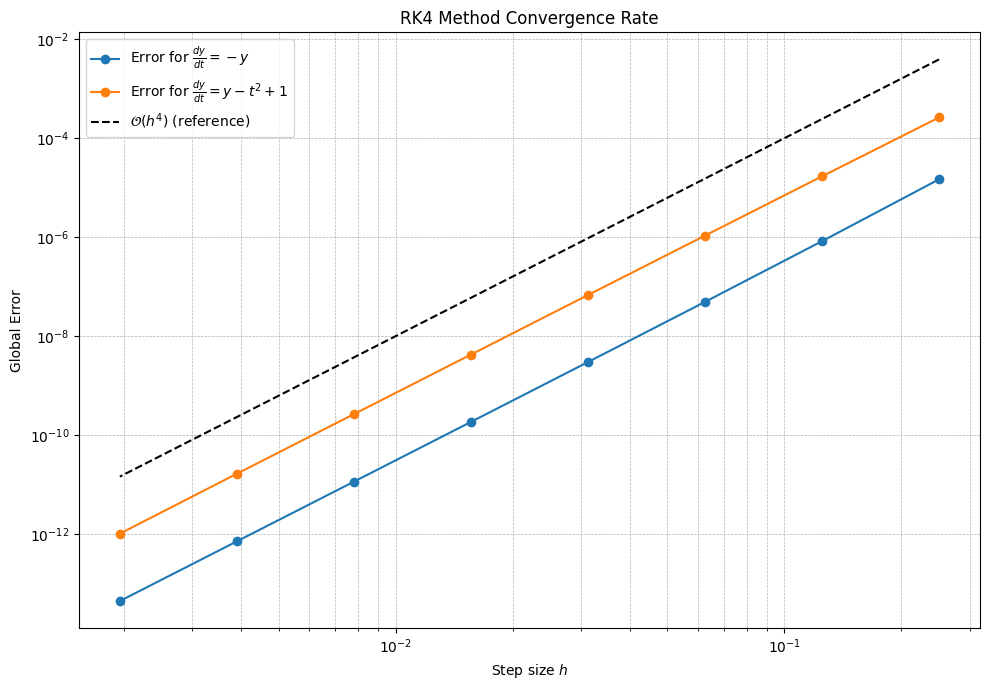

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def rk4(f, y0, t0, tf, h):
    N = int((tf - t0) / h)
    y = y0
    t = t0
    for _ in range(N):
        k1 = h * f(t, y)
        k2 = h * f(t + h/2, y + k1/2)
        k3 = h * f(t + h/2, y + k2/2)
        k4 = h * f(t + h, y + k3)
        y += (k1 + 2*k2 + 2*k3 + k4) / 6
        t += h
    return y

# Define two cleanly separated ODE problems
problems = [
    {
        'name': r"$\frac{dy}{dt} = -y$",
        'f': lambda t, y: -y,
        'exact': lambda t: np.exp(-t),
        'y0': 1.0,
        't0': 0,
        'tf': 1
    },
    {
        'name': r"$\frac{dy}{dt} = y - t^2 + 1$",
        'f': lambda t, y: y - t**2 + 1,
        'exact': lambda t: (t + 1)**2 - 0.5*np.exp(t),
        'y0': 0.5,
        't0': 0,
        'tf': 2
    }
]

# Step sizes for convergence test
h_values = [2**(-n) for n in range(2, 10)]
colors = ['tab:blue', 'tab:orange']

# Plot convergence for each function
plt.figure(figsize=(10, 7))
for i, problem in enumerate(problems):
    errors = []
    for h in h_values:
        y_approx = rk4(problem['f'], problem['y0'], problem['t0'], problem['tf'], h)
        y_exact = problem['exact'](problem['tf'])
        errors.append(abs(y_exact - y_approx))
    plt.loglog(h_values, errors, 'o-', label=f"Error for {problem['name']}", color=colors[i])

# Add the 4th-order reference slope
plt.loglog(h_values, [h**4 for h in h_values], 'k--', label=r"$\mathcal{O}(h^4)$ (reference)")

# Beautify plot
plt.xlabel("Step size $h$")
plt.ylabel("Global Error")
plt.title("RK4 Method Convergence Rate")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()


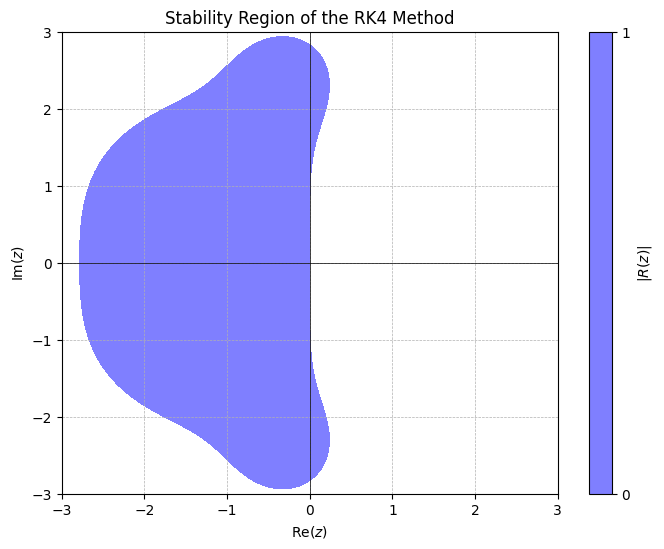

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the RK4 stability function
def R(z):
    return 1 + z + (z**2)/2 + (z**3)/6 + (z**4)/24

# Generate a grid in the complex plane
x_vals = np.linspace(-3, 3, 400)  # Real axis values
y_vals = np.linspace(-3, 3, 400)  # Imaginary axis values
X, Y = np.meshgrid(x_vals, y_vals)  # Create a meshgrid
Z = X + 1j * Y  # Complex grid

# Compute the magnitude of the stability function
R_vals = np.abs(R(Z))

# Plot the stability region where |R(z)| <= 1
plt.figure(figsize=(8, 6))
plt.contourf(X, Y, R_vals, levels=[0, 1], colors=['blue'], alpha=0.5)
plt.colorbar(label=r'$|R(z)|$')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlabel(r'Re$(z)$')
plt.ylabel(r'Im$(z)$')
plt.title('Stability Region of the RK4 Method')
plt.grid(True, linestyle='--', linewidth=0.5)

plt.show()
